<a href="https://colab.research.google.com/github/DamodaraBarbosa/projeto_analise_de_dados_DIO/blob/main/Projeto_Python_e_Pandas_Aula_6_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Definindo parâmetros para pyplot

In [3]:
pd.options.display.float_format = '{:.2f}'.format
plt.rcParams['figure.figsize'] = (15, 9)
parametros = {'axes.labelsize': 25, 'axes.titlesize': 25}
plt.rcParams.update(parametros)

Importando o dataframe

In [4]:
df = pd.read_csv('/content/Cidades_nordeste.csv')

## Visualização de dados

In [5]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/vendas,Ano_venda,Mês_venda,Dia_venda,Trimestre
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.00,2018,1,1,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.00,2018,1,1,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.00,2018,1,1,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.00,2018,1,1,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.00,2018,1,1,1


In [6]:
# método para contar valores:
# o parâmetro ascending= False já é padrão do método

df['LojaID'].value_counts().keys()

Int64Index([1036, 1035, 1037, 1034,  983,  982, 1522, 1520,  980,  981, 1005,
            1002, 1523,  852, 1004,  854,  853, 1521, 1003],
           dtype='int64')

In [7]:
df['LojaID'].value_counts().values

array([117, 112, 101,  67,  65,  44,  41,  39,  36,  31,  30,  30,  29,
        29,  28,  28,  26,  21,  20])

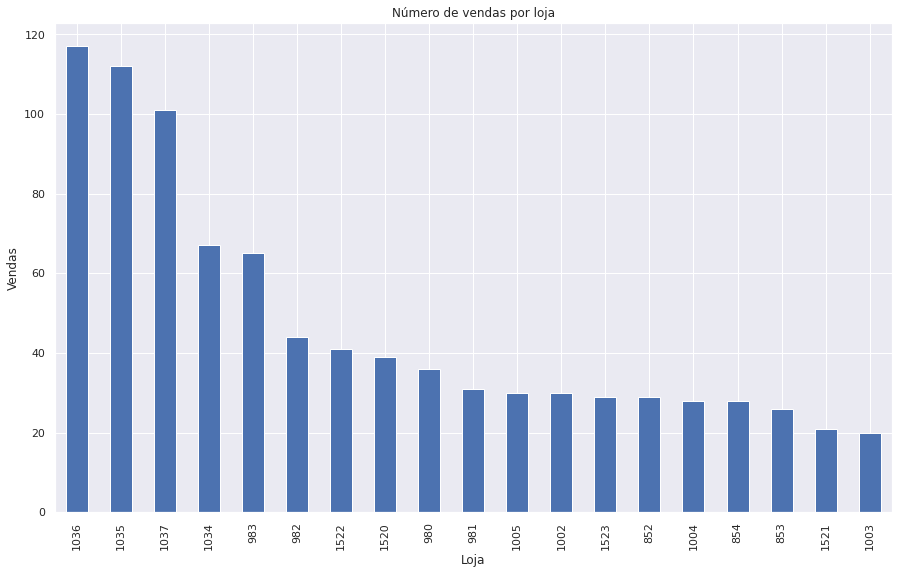

In [8]:
# para mostrar em um gráfico:

sns.set()
plt.title('Número de vendas por loja')
df['LojaID'].value_counts().plot.bar()
plt.ylabel('Vendas')
plt.xlabel('Loja')
plt.show()

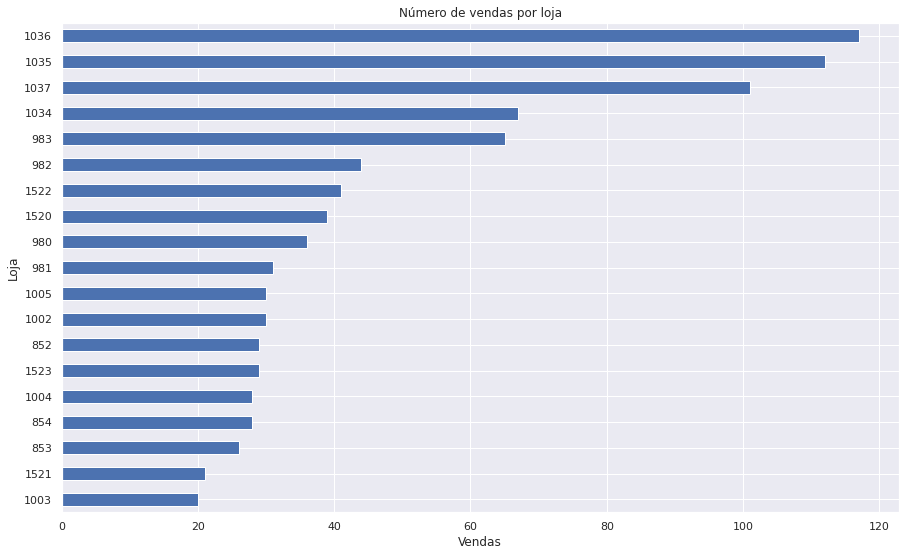

In [9]:
# gráfico de lojas na horizontal:

vendas_loja = df['LojaID'].value_counts(ascending= True)
plt.title('Número de vendas por loja')
vendas_loja.plot.barh()
plt.ylabel('Loja')
plt.xlabel('Vendas')
plt.show()

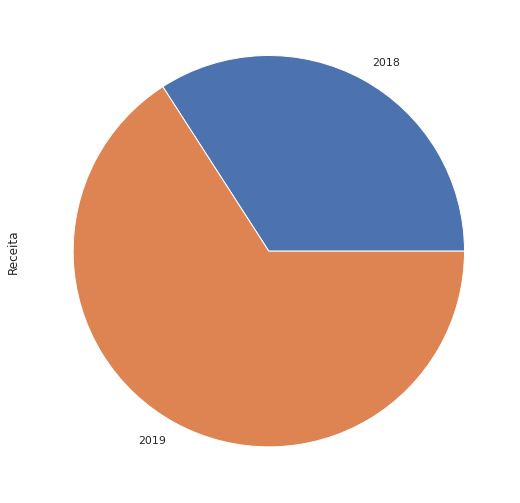

In [10]:
# gráfico de pizza:

df.groupby('Ano_venda')['Receita'].sum().plot.pie()
plt.show()

In [11]:
keys = df.groupby('Cidade')['Vendas'].sum().keys()

In [12]:
values = df.groupby('Cidade')['Vendas'].sum().values

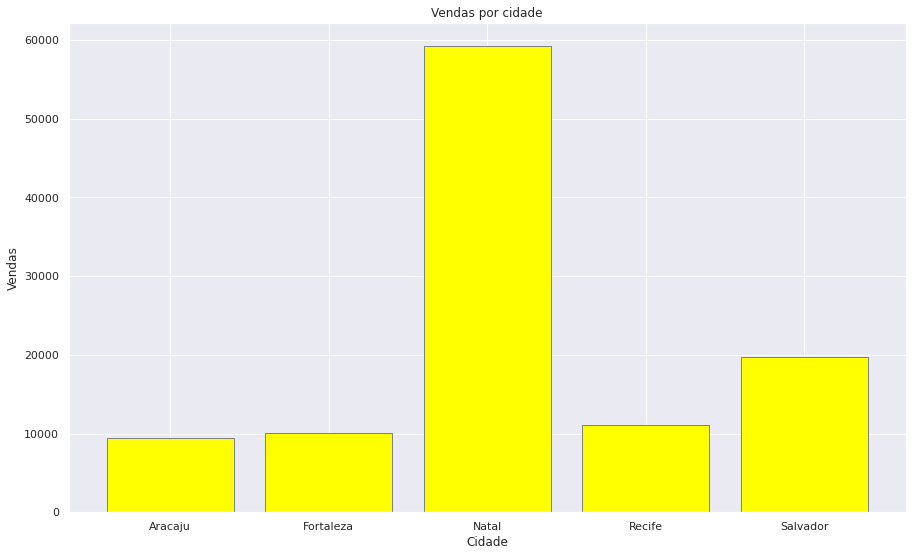

In [13]:
# uma outra forma de plotar o gráfico usando diretamente a biblioteca matplotlib e alterando a cor:
# pode-se alterar também a borda da barra no gráfico

plt.title('Vendas por cidade')
plt.bar(keys, values, color= 'yellow', 
        edgecolor= 'gray')
plt.xlabel('Cidade')
plt.ylabel('Vendas')
plt.show()

In [14]:
# alterando estilo com a biblioteca matplotlib:

plt.style.use('ggplot')

In [15]:
keys = df.groupby('Mês_venda')['Qtde'].sum().keys()

In [16]:
values = df.groupby('Mês_venda')['Qtde'].sum().values

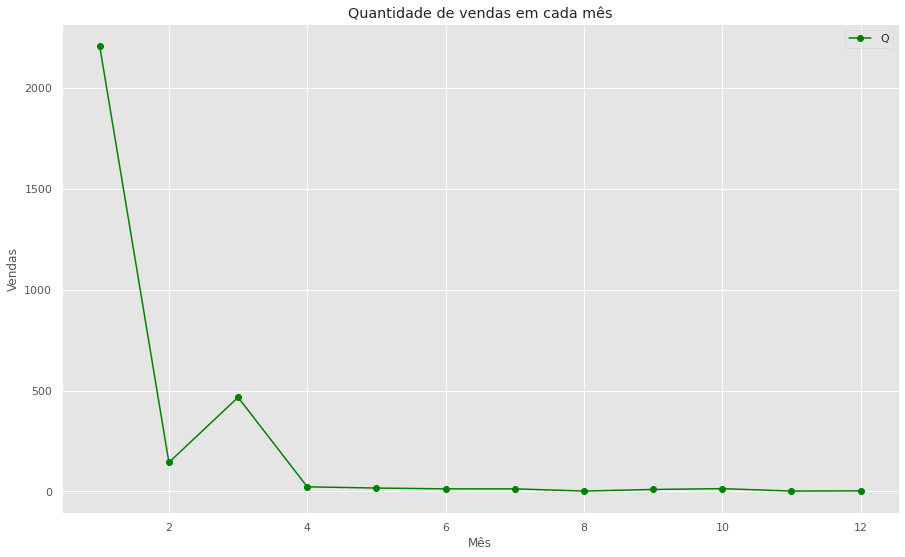

In [17]:
# gerando um gráfico de linhas:

plt.title('Quantidade de vendas em cada mês')
plt.plot(keys, values, color= 'green', marker = 'o')
plt.ylabel('Vendas')
plt.xlabel('Mês')
plt.legend('Qtde')
plt.show()

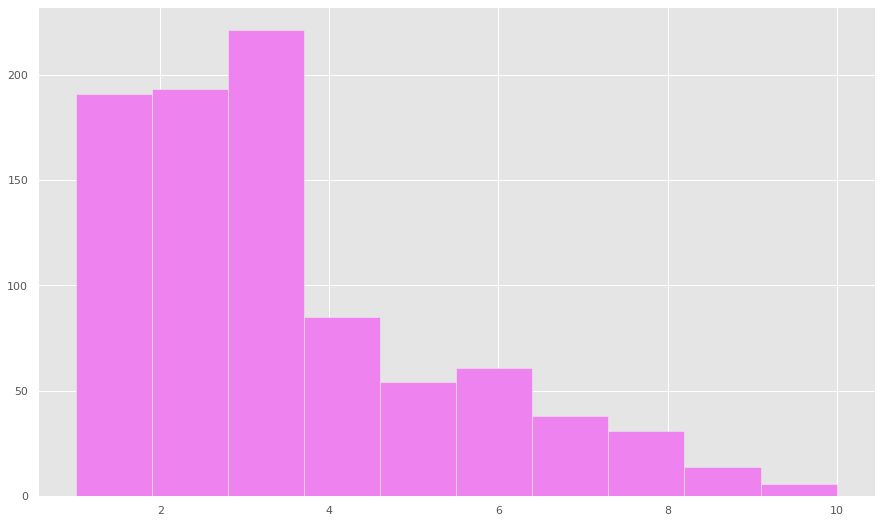

In [24]:
# plotando um histograma:

plt.hist(df['Qtde'], color= 'violet')
plt.show()

In [25]:
df_2019 = df.query('Ano_venda == 2019')

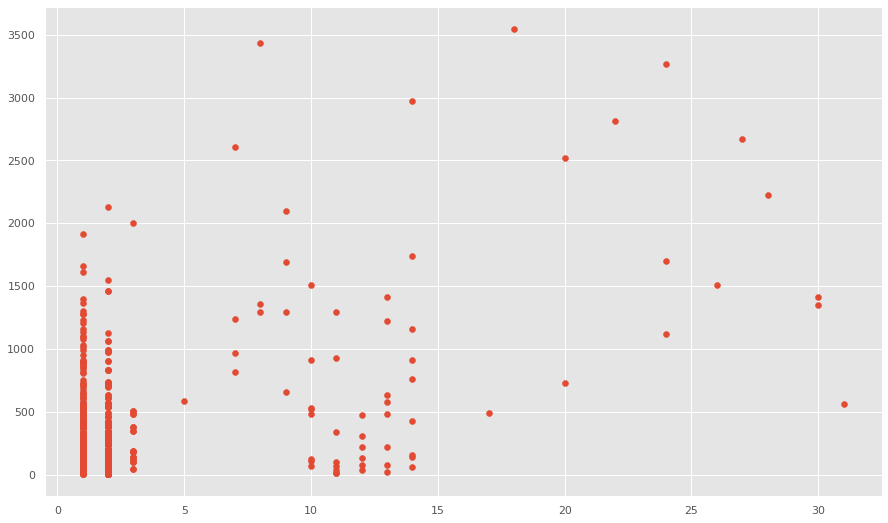

<Figure size 1080x648 with 0 Axes>

In [34]:
# plotando um gráfico de dispersão e salvando o gráfico:

ax = plt.scatter(df_2019['Dia_venda'], df_2019['Receita'])
plt.show()
plt.savefig('Receita por dia.png')